# Bitcoin LSTM Model with Tweet Volume and Sentiment

In [485]:
import pandas as pd
import re 
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import os # accessing directory structure
import os
print(os.listdir("../input"))

['bitcoin-tweets-14m', 'btc-price']


# Data Pre-processing

In [486]:
raw_df = pd.read_csv('../input/bitcoin-tweets-14m/cleanprep.csv', delimiter=',', error_bad_lines=False,engine = 'python',header = None)

In [487]:
#-----------------Pre-processing -------------------#
raw_df.columns =['dt', 'name','text','polarity','sensitivity']

In [488]:
raw_df['dt'] = pd.to_datetime(raw_df['dt'])

In [489]:
raw_df['DateTime'] = raw_df['dt'].dt.floor('h')
raw_df.head()

,dt,name,text,polarity,sensitivity,DateTime
0,2018-07-11 19:35:15.363270,b'tj',"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909,2018-07-11 19:00:00
1,2018-07-11 19:35:15.736769,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000,2018-07-11 19:00:00
2,2018-07-11 19:35:15.744769,b'Gary Lang',b'Duplicate skilled traders automatically with...,0.625000,0.500000,2018-07-11 19:00:00
3,2018-07-11 19:35:15.867339,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000,2018-07-11 19:00:00
4,2018-07-11 19:35:16.021448,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000,2018-07-11 19:00:00


In [490]:
tweet_volume_df = raw_df.groupby(pd.Grouper(key='dt',freq='H')).size().reset_index(name='tweet_vol')

In [491]:
tweet_volume_df.head()

,dt,tweet_vol
0,2018-07-11 19:00:00,1747
1,2018-07-11 20:00:00,4354
2,2018-07-11 21:00:00,4432
3,2018-07-11 22:00:00,3980
4,2018-07-11 23:00:00,3830


In [492]:
tweet_volume_df.index = pd.to_datetime(tweet_volume_df.index)
tweet_volume_df=tweet_volume_df.set_index('dt')

In [493]:
raw_df.index = pd.to_datetime(raw_df.index)

In [494]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1413001 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.001413
Data columns (total 6 columns):
dt             1413001 non-null datetime64[ns]
name           1413001 non-null object
text           1413001 non-null object
polarity       1413001 non-null float64
sensitivity    1413001 non-null float64
DateTime       1413001 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 75.5+ MB


In [495]:
tweet_volume_df['tweet_vol'] =tweet_volume_df['tweet_vol'].astype(float)

In [496]:
tweet_volume_df.head()

,tweet_vol
dt,
2018-07-11 19:00:00,1747.0
2018-07-11 20:00:00,4354.0
2018-07-11 21:00:00,4432.0
2018-07-11 22:00:00,3980.0
2018-07-11 23:00:00,3830.0


In [497]:
raw_df.head()

,dt,name,text,polarity,sensitivity,DateTime
1970-01-01 00:00:00.000000000,2018-07-11 19:35:15.363270,b'tj',"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909,2018-07-11 19:00:00
1970-01-01 00:00:00.000000001,2018-07-11 19:35:15.736769,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000002,2018-07-11 19:35:15.744769,b'Gary Lang',b'Duplicate skilled traders automatically with...,0.625000,0.500000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000003,2018-07-11 19:35:15.867339,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000004,2018-07-11 19:35:16.021448,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000,2018-07-11 19:00:00


In [498]:
df = raw_df.groupby('DateTime').agg(lambda x: x.mean())
df.head()

,polarity,sensitivity
DateTime,,
2018-07-11 19:00:00,0.109705,0.187557
2018-07-11 20:00:00,0.102657,0.216148
2018-07-11 21:00:00,0.098004,0.218612
2018-07-11 22:00:00,0.096688,0.231342
2018-07-11 23:00:00,0.103997,0.217739


In [499]:
df['Tweet_vol'] = tweet_volume_df['tweet_vol']
df.head()

,polarity,sensitivity,Tweet_vol
DateTime,,,
2018-07-11 19:00:00,0.109705,0.187557,1747.0
2018-07-11 20:00:00,0.102657,0.216148,4354.0
2018-07-11 21:00:00,0.098004,0.218612,4432.0
2018-07-11 22:00:00,0.096688,0.231342,3980.0
2018-07-11 23:00:00,0.103997,0.217739,3830.0


In [500]:
df = df.drop(df.index[0])

In [501]:
btcDF = pd.read_csv('../input/btc-price/btcSave2.csv', error_bad_lines=False,engine = 'python')

In [502]:
btcDF['Timestamp'] = pd.to_datetime(btcDF['Timestamp'])
btcDF = btcDF.set_index(pd.DatetimeIndex(btcDF['Timestamp']))

In [503]:
btcDF = btcDF.drop(['Timestamp'], axis=1)

In [504]:
btcDF.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,
2018-07-10 01:00:00,6666.75,6683.90,6635.59,6669.73,281.73,1875693.72,6657.70
2018-07-10 02:00:00,6662.44,6674.60,6647.00,6647.00,174.10,1160103.29,6663.38
2018-07-10 03:00:00,6652.52,6662.82,6621.99,6632.53,231.41,1536936.22,6641.70
2018-07-10 04:00:00,6631.17,6655.48,6625.54,6635.92,120.38,799154.77,6638.52
2018-07-10 05:00:00,6632.81,6651.06,6627.64,6640.57,94.00,624289.31,6641.32


In [505]:
Final_df = pd.merge(df,btcDF, how='inner',left_index=True, right_index=True)
Final_df=Final_df.drop(['Weighted Price'],axis=1 )
Final_df.columns = ['Polarity', 'Sensitivity','Tweet_vol','Open','High','Low', 'Close_Price', 'Volume_BTC', 'Volume_Dollar']
Final_df = Final_df[['Polarity', 'Sensitivity','Tweet_vol', 'Open','High','Low', 'Volume_BTC', 'Volume_Dollar', 'Close_Price']]
Final_df.head()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
2018-07-11 20:00:00,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,986.73,6231532.37,6350.00
2018-07-11 21:00:00,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,126.46,804221.55,6356.48
2018-07-11 22:00:00,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,259.10,1646353.87,6361.93
2018-07-11 23:00:00,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,81.54,519278.69,6368.78
2018-07-12 00:00:00,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,124.55,793560.22,6380.00


In [506]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2018-07-11 20:00:00 to 2018-07-24 01:00:00
Data columns (total 9 columns):
Polarity         294 non-null float64
Sensitivity      294 non-null float64
Tweet_vol        294 non-null float64
Open             294 non-null float64
High             294 non-null float64
Low              294 non-null float64
Volume_BTC       294 non-null float64
Volume_Dollar    294 non-null float64
Close_Price      294 non-null float64
dtypes: float64(9)
memory usage: 23.0 KB


In [507]:
#---------------Stage 1 Complete ------------------#
Final_df.to_csv('Sentiment.csv')

# Exploratory Analysis

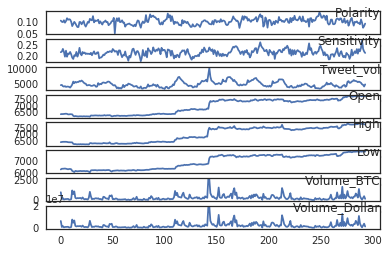

In [508]:
#--------------Analysis----------------------------#

values = Final_df.values
groups = [0,1,2,3,4,5,6,7]
i =1  
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1,i)
    pyplot.plot(values[:,group])
    pyplot.title(Final_df.columns[group], y=.5, loc='right')
    i += 1
pyplot.show()

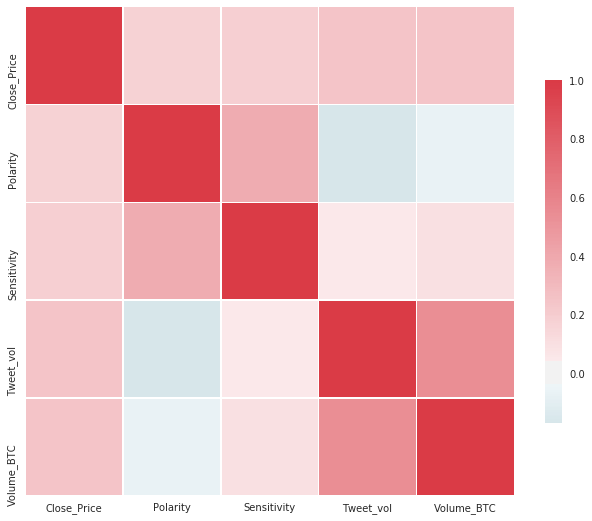

In [509]:
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

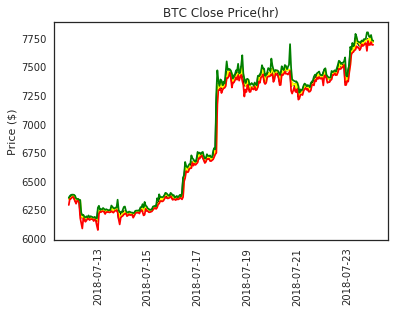

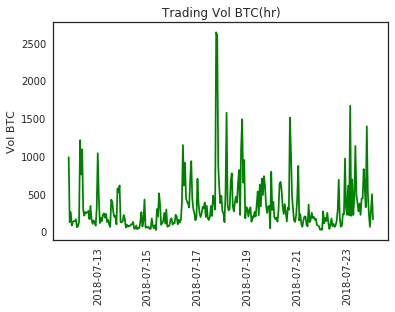

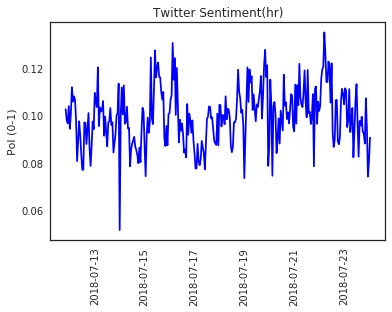

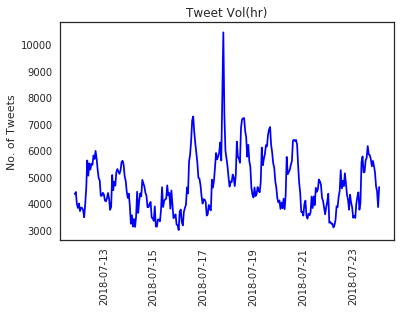

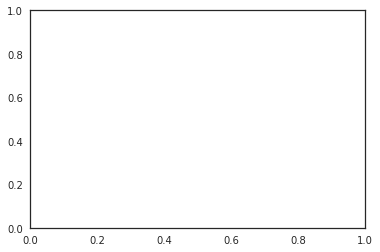

In [510]:
plt.plot(Final_df.index, Final_df['Close_Price'], 'black')
plt.plot(Final_df.index, Final_df['Open'], 'yellow')
plt.plot(Final_df.index, Final_df['Low'], 'red')
plt.plot(Final_df.index, Final_df['High'], 'green')
plt.title('BTC Close Price(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)');
plt.show();

plt.plot(Final_df.index, Final_df['Volume_BTC'], 'g')
plt.title('Trading Vol BTC(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Vol BTC');
plt.show();

plt.plot(Final_df.index, Final_df['Polarity'], 'b')
plt.xticks(rotation='vertical')
plt.title('Twitter Sentiment(hr)')
plt.ylabel('Pol (0-1)');
plt.show();
plt.legend()

plt.plot(Final_df.index, Final_df['Tweet_vol'], 'b')
plt.xticks(rotation='vertical')
plt.title('Tweet Vol(hr)')
plt.ylabel('No. of Tweets');
plt.show();
plt.legend()

In [511]:
#sns Heatmap for Hour x volume 
#Final_df['time']=Final_df.index.time()
Final_df['time']=Final_df.index.to_series().apply(lambda x: x.strftime("%X"))
Final_df.head()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price,time
2018-07-11 20:00:00,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,986.73,6231532.37,6350.00,20:00:00
2018-07-11 21:00:00,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,126.46,804221.55,6356.48,21:00:00
2018-07-11 22:00:00,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,259.10,1646353.87,6361.93,22:00:00
2018-07-11 23:00:00,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,81.54,519278.69,6368.78,23:00:00
2018-07-12 00:00:00,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,124.55,793560.22,6380.00,00:00:00


In [512]:
hour_df=Final_df
hour_df=hour_df.groupby('time').agg(lambda x: x.mean())
hour_df.head()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
time,,,,,,,,,
00:00:00,0.090298,0.211771,3976.384615,6930.237692,6958.360769,6900.588462,322.836154,2.228120e+06,6935.983077
01:00:00,0.099596,0.211714,4016.615385,6935.140769,6963.533846,6894.772308,318.415385,2.243338e+06,6933.794615
02:00:00,0.102724,0.204445,3824.083333,6868.211667,6889.440000,6842.588333,158.836667,1.105651e+06,6870.695833
03:00:00,0.105586,0.214824,3791.666667,6870.573333,6909.675833,6855.316667,328.811667,2.385733e+06,6888.139167
04:00:00,0.103095,0.208516,3822.916667,6887.420000,6911.649167,6872.603333,271.692500,1.949230e+06,6890.985000


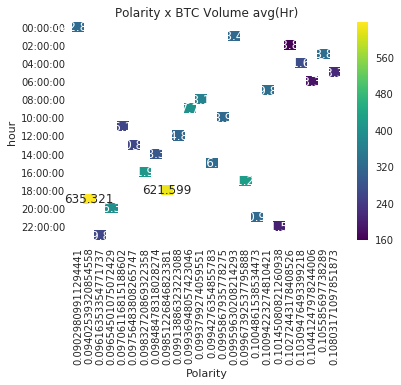

In [513]:
#sns Hourly Heatmap
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='hour', columns='Polarity', values='Volume_BTC')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('Polarity x BTC Volume avg(Hr)')
plt.show()

#sns daily heatmap?

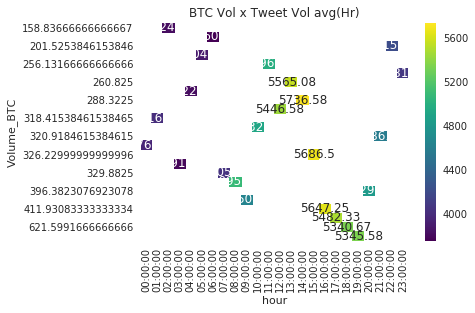

In [514]:
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='Volume_BTC', columns='hour', values='Tweet_vol')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('BTC Vol x Tweet Vol avg(Hr)')
plt.show()

# LSTM Model

In [515]:
#---------------- LSTM Prep ------------------------#

In [516]:
df = Final_df
df = df.drop(['Open','High', 'Low', 'Volume_Dollar'], axis=1)
df.head()

,Polarity,Sensitivity,Tweet_vol,Volume_BTC,Close_Price,time
2018-07-11 20:00:00,0.102657,0.216148,4354.0,986.73,6350.00,20:00:00
2018-07-11 21:00:00,0.098004,0.218612,4432.0,126.46,6356.48,21:00:00
2018-07-11 22:00:00,0.096688,0.231342,3980.0,259.10,6361.93,22:00:00
2018-07-11 23:00:00,0.103997,0.217739,3830.0,81.54,6368.78,23:00:00
2018-07-12 00:00:00,0.094383,0.195256,3998.0,124.55,6380.00,00:00:00


In [517]:
df = df[['Close_Price', 'Polarity', 'Sensitivity','Tweet_vol','Volume_BTC']]
df.head()

,Close_Price,Polarity,Sensitivity,Tweet_vol,Volume_BTC
2018-07-11 20:00:00,6350.00,0.102657,0.216148,4354.0,986.73
2018-07-11 21:00:00,6356.48,0.098004,0.218612,4432.0,126.46
2018-07-11 22:00:00,6361.93,0.096688,0.231342,3980.0,259.10
2018-07-11 23:00:00,6368.78,0.103997,0.217739,3830.0,81.54
2018-07-12 00:00:00,6380.00,0.094383,0.195256,3998.0,124.55


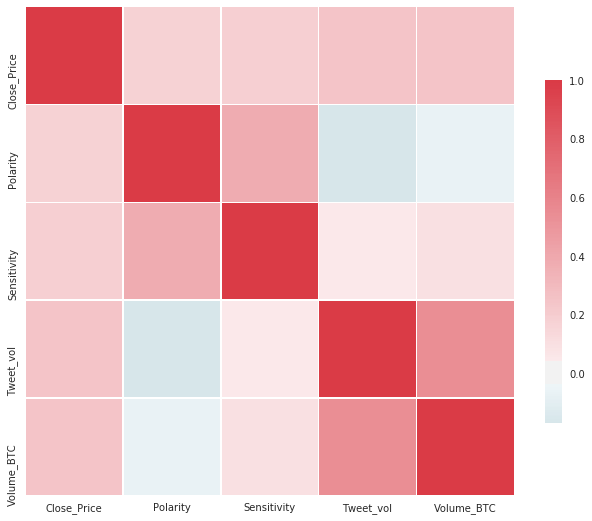

In [518]:
cor = df.corr()
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

In [519]:
#---------------- LSTM Model ------------------------#
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [520]:
values = df.values
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df[['Close_Price', 'Polarity', 'Sensitivity','Tweet_vol','Volume_BTC']]
df.head()

,Close_Price,Polarity,Sensitivity,Tweet_vol,Volume_BTC
2018-07-11 20:00:00,6350.00,0.102657,0.216148,4354.0,986.73
2018-07-11 21:00:00,6356.48,0.098004,0.218612,4432.0,126.46
2018-07-11 22:00:00,6361.93,0.096688,0.231342,3980.0,259.10
2018-07-11 23:00:00,6368.78,0.103997,0.217739,3830.0,81.54
2018-07-12 00:00:00,6380.00,0.094383,0.195256,3998.0,124.55


In [521]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

n_hours = 4 #adding 4 hours lags creating number of observations 
n_features = 5 #Features in the dataset.
n_obs = n_hours*n_features

In [522]:
n_hours = 4 #adding 4 hours lags creating number of observations 
n_features = 5 #Features in the dataset.
n_obs = n_hours*n_features

In [523]:
reframed = series_to_supervised(scaled, n_hours, 1)
reframed.head()

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
4,0.125479,0.611105,0.429055,0.181916,0.368430,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164
5,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637
6,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561
7,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561,0.111101,0.649855,0.365349,0.111752,0.053607
8,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561,0.111101,0.649855,0.365349,0.111752,0.053607,0.118921,0.676582,0.345485,0.099946,0.013985


In [524]:
reframed.drop(reframed.columns[-4], axis=1)
reframed.head()

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
4,0.125479,0.611105,0.429055,0.181916,0.368430,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164
5,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637
6,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561
7,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561,0.111101,0.649855,0.365349,0.111752,0.053607
8,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561,0.111101,0.649855,0.365349,0.111752,0.053607,0.118921,0.676582,0.345485,0.099946,0.013985


In [525]:
print(reframed.head())

   var1(t-4)  var2(t-4)  var3(t-4)    ...      var3(t)   var4(t)   var5(t)
4   0.125479   0.611105   0.429055    ...     0.214693  0.134156  0.039164
5   0.129527   0.555312   0.454335    ...     0.500135  0.095922  0.045637
6   0.132931   0.539534   0.584943    ...     0.212514  0.113362  0.045561
7   0.137210   0.627175   0.445375    ...     0.365349  0.111752  0.053607
8   0.144218   0.511893   0.214693    ...     0.345485  0.099946  0.013985

[5 rows x 25 columns]


In [526]:
values = reframed.values
n_train_hours = 200
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train.shape

(200, 25)

In [527]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [528]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(200, 4, 5) (200,) (90, 4, 5) (90,)


In [529]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=6, validation_data=(test_X, test_y), verbose=2, shuffle=False,validation_split=0.2)
# plot history

Train on 200 samples, validate on 90 samples
Epoch 1/50
 - 2s - loss: 0.2255 - val_loss: 0.5665
Epoch 2/50
 - 0s - loss: 0.2084 - val_loss: 0.5214
Epoch 3/50
 - 0s - loss: 0.1976 - val_loss: 0.4847
Epoch 4/50
 - 0s - loss: 0.1839 - val_loss: 0.4462
Epoch 5/50
 - 0s - loss: 0.1658 - val_loss: 0.3960
Epoch 6/50
 - 0s - loss: 0.1486 - val_loss: 0.3436
Epoch 7/50
 - 0s - loss: 0.1244 - val_loss: 0.2765
Epoch 8/50
 - 0s - loss: 0.0987 - val_loss: 0.1971
Epoch 9/50
 - 0s - loss: 0.0777 - val_loss: 0.1440
Epoch 10/50
 - 0s - loss: 0.0605 - val_loss: 0.0960
Epoch 11/50
 - 0s - loss: 0.0568 - val_loss: 0.0909
Epoch 12/50
 - 0s - loss: 0.0521 - val_loss: 0.0875
Epoch 13/50
 - 0s - loss: 0.0489 - val_loss: 0.0853
Epoch 14/50
 - 0s - loss: 0.0455 - val_loss: 0.0769
Epoch 15/50
 - 0s - loss: 0.0433 - val_loss: 0.0768
Epoch 16/50
 - 0s - loss: 0.0399 - val_loss: 0.0735
Epoch 17/50
 - 0s - loss: 0.0371 - val_loss: 0.0656
Epoch 18/50
 - 0s - loss: 0.0350 - val_loss: 0.0613
Epoch 19/50
 - 0s - loss: 0.

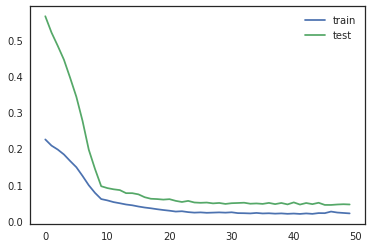

In [530]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [531]:
test_X

array([[[0.82192157, 0.6247309 , 0.27459674, 0.11027636, 0.06356717],
        [0.81034741, 0.6477166 , 0.53739922, 0.15870673, 0.04270782],
        [0.78743645, 0.58564215, 0.44683167, 0.10517843, 0.09845751],
        [0.7618771 , 0.38916258, 0.41718594, 0.17641535, 0.23253096]],

       [[0.81034741, 0.6477166 , 0.53739922, 0.15870673, 0.04270782],
        [0.78743645, 0.58564215, 0.44683167, 0.10517843, 0.09845751],
        [0.7618771 , 0.38916258, 0.41718594, 0.17641535, 0.23253096],
        [0.80618746, 0.46064198, 0.31838508, 0.36986853, 0.24359077]],

       [[0.78743645, 0.58564215, 0.44683167, 0.10517843, 0.09845751],
        [0.7618771 , 0.38916258, 0.41718594, 0.17641535, 0.23253096],
        [0.80618746, 0.46064198, 0.31838508, 0.36986853, 0.24359077],
        [0.82017264, 0.5647824 , 0.47179418, 0.28253287, 0.20115792]],

       ...,

       [[0.99090557, 0.48852541, 0.57307355, 0.34987926, 0.52485211],
        [0.99631476, 0.43731438, 0.4703971 , 0.32492621, 0.18800912],
 

In [532]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours* n_features,))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse = (mean_squared_error(inv_y, inv_yhat))
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test MSE: 8474.436
Test RMSE: 92.057


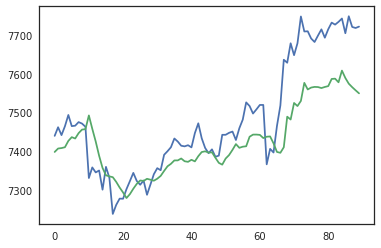

In [533]:
plt.plot(inv_y, label='Real')
plt.plot(inv_yhat, label='Predicted')